In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy 

rdi = [0,30]
# rdi = rango de integracion
f = lambda z: 200 * (z/(5+z)) * np.exp((-2*z)/300)


In [2]:
def funcion_pesos (n):
    
    X = np.zeros((7,7))
    X[1:7,0] = [-1/np.sqrt(3),-np.sqrt(0.6),-0.861136311594953,-0.906179845938664,-0.932469514203152,-0.949107912342759]
    X[2:6,1] = [-0.339981043584856,-0.538469310105683,-0.661209386466265,-0.741531185599394]
    X[3:5,2] = [-0.238619186083197,-0.405845151377397]
    X1 = copy.copy(X)
    X1 = -np.transpose(X1)
    X = X1 + X

    Pesos = np.zeros((7,7))
    Pesos[1:7,0] = [1,5/9,0.347854845137454,0.236926885056189,0.171324492379170,0.129484966168870]
    Pesos[2:6,1] = [0.652145154862546,0.478628670499366,0.360761573048139,0.279705391489277]
    Pesos[3:5,2] = [0.467913934572691,0.381830050505119]
    Pesos1 = copy.copy(Pesos)
    Pesos1 = np.transpose(Pesos1)
    Pesos = Pesos1 + Pesos
    Pesos[0,0] = 2
    Pesos[1,1] = 8/9
    Pesos[2,2] = 0.568888888888889
    Pesos[3,3] = 0.417959183673469

    X_salida = []
    Pesos_salida = []
    for i in range(n):
        X_salida.append(X[n-i-1,i])
        Pesos_salida.append(Pesos[n-i-1,i])

    return X_salida, Pesos_salida


In [3]:
'''Metodo de trapecios'''

def trapecios (rdi,f,x):
    #x = np.linspace (int(rdi[0]),int(rdi[1]),300)
    #x = np.arange(0,30.5,0.5)
    n = len(x)
    alfa = f(rdi[1]) + f(rdi[0])
    for i in range (1,n-1):    
        alfa += 2 * f(x[i])
    
    I = ((rdi[1]-rdi[0])/(n))*((alfa)/2)

    return I

In [4]:
'''Metodo de simpson'''

def Simpson (rdi,f,x):
    #x = np.linspace (int(rdi[0]),int(rdi[1]),300)
    #x = np.arange(0,30.5,0.5)
    n = len(x)
    alfa = f(rdi[1]) + f(rdi[0])

    for i in range (1,n-1):    
        if (i % 2 == 0):  #verifico si el x esta en una posicion par 
             alfa += 4 * f(x[i])
        else:
             alfa += 2 * f(x[i])
    
    I = ((rdi[1]-rdi[0])/(n-1))*((alfa)/3)
    
    return I



In [5]:
'''Cuadratura de gauss'''

def cuadratura (rdi,f,n):
    lineal = lambda x,m,b: m*x+b 
    
    m = (rdi[1]-rdi[0])/2
    b = (rdi[1]+rdi[0])/2
    I = 0
    X,peso = funcion_pesos(n)
    
    for i in range(len(X)):  
        I += f(lineal(m,X[i],b))*peso[i]
        
    Int = m*I

    return Int

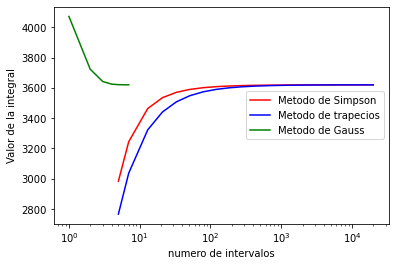

In [27]:
simpson = []
Trapecios = []
gauss = []
t = np.logspace(0.5,4,20).astype(int)*2-1 #"solo tomo intervalos impares"
Zeta = np.arange(1,8)
for i in range(1,8):
    gauss.append(cuadratura(rdi,f,i))
    
for i in t:
    x = np.linspace(rdi[0],rdi[1],i)
    simpson.append(Simpson(rdi,f,x))
    Trapecios.append(trapecios(rdi,f,x))

plt.semilogx(t,simpson,'r', label ='Metodo de Simpson')
plt.semilogx(t,Trapecios,'b', label = 'Metodo de trapecios')
plt.semilogx(Zeta,gauss,'g', label ='Metodo de Gauss')
plt.legend(loc = 'center right')
plt.ylabel('Valor de la integral')
plt.xlabel('numero de intervalos')
plt.show()




In [ ]:
# punto efectivo 
x = np.linspace (int(rdi[0]),int(rdi[1]),300)
I = Simpson(rdi,f,x)
J = lambda z: (1/I) * z * 200 * (z/(5+z)) * np.exp((-2*z)/300)
Fuerza = Simpson(rdi,J,x)
print(Fuerza)